In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/Mystic/Desktop/Student_Habits/data/student_habits_performance.csv")
print(df.head())
print("Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())

  student_id  age  gender  study_hours_per_day  social_media_hours  \
0      S1000   23  Female                  0.0                 1.2   
1      S1001   20  Female                  6.9                 2.8   
2      S1002   21    Male                  1.4                 3.1   
3      S1003   23  Female                  1.0                 3.9   
4      S1004   19  Female                  5.0                 4.4   

   netflix_hours part_time_job  attendance_percentage  sleep_hours  \
0            1.1            No                   85.0          8.0   
1            2.3            No                   97.3          4.6   
2            1.3            No                   94.8          8.0   
3            1.0            No                   71.0          9.2   
4            0.5            No                   90.9          4.9   

  diet_quality  exercise_frequency parental_education_level internet_quality  \
0         Fair                   6                   Master          Average  

In [17]:
df.drop_duplicates(inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

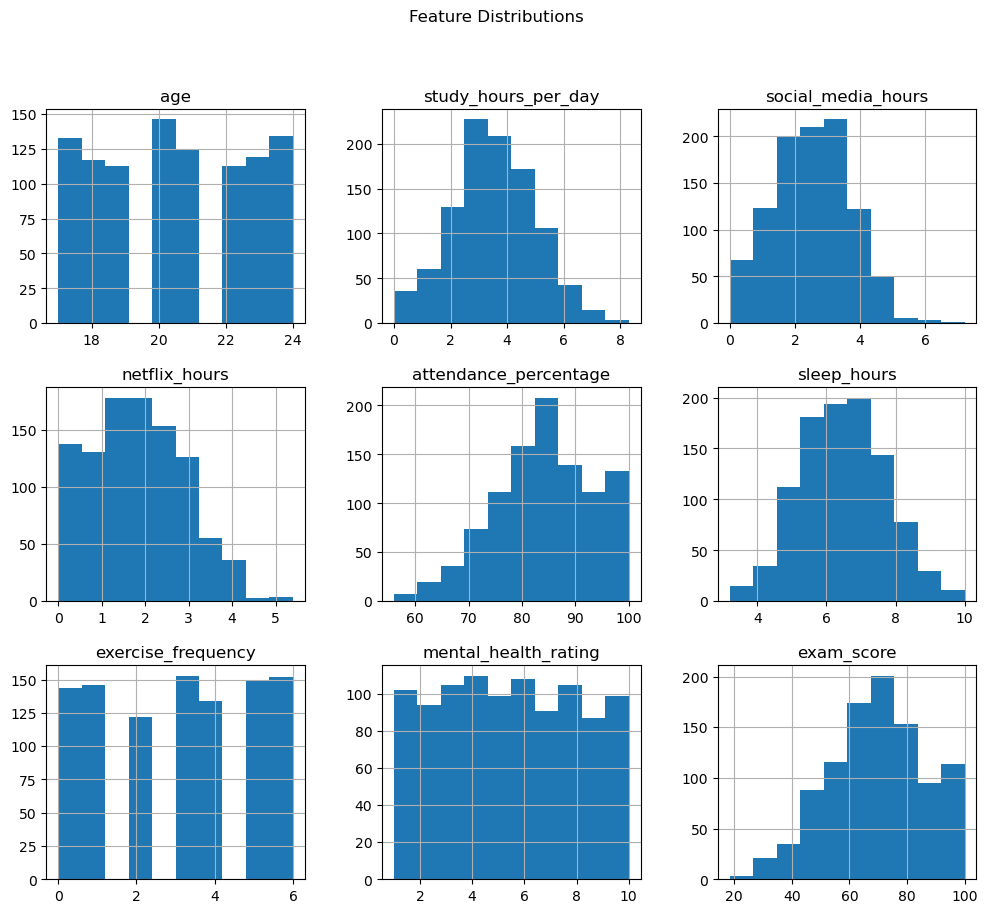

In [19]:
df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions")
plt.show()

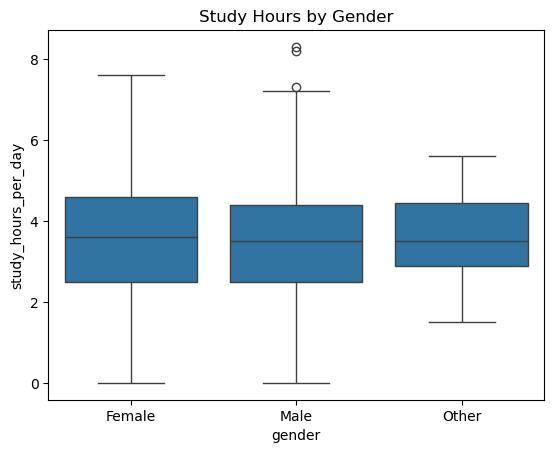

In [21]:
sns.boxplot(x='gender', y='study_hours_per_day', data=df)
plt.title("Study Hours by Gender")
plt.show()

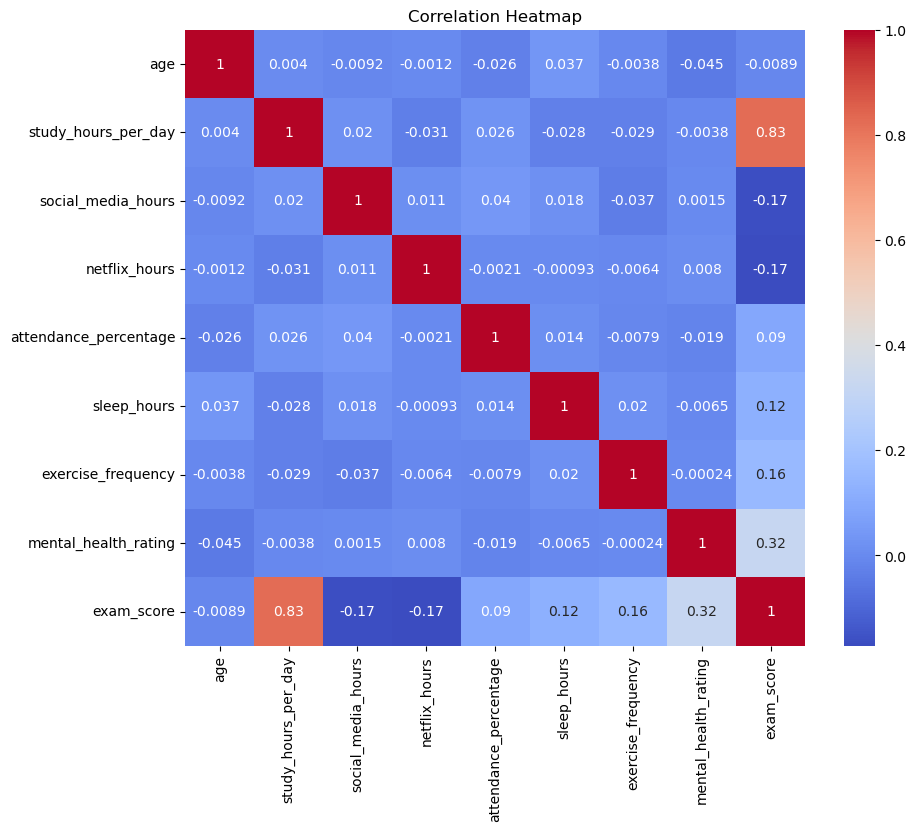

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [25]:
correlations = df.corr(numeric_only=True)['exam_score'].sort_values(ascending=False)
print("Correlations with Exam Score:\n", correlations)

Correlations with Exam Score:
 exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=['student_id', 'exam_score'])
X = pd.get_dummies(X, drop_first=True)  # Handle categorical columns
y = df['exam_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.8967960242988819
MSE: 26.464502192643657


In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

features = df.drop(columns=['student_id', 'exam_score'])
features = pd.get_dummies(features, drop_first=True)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
df['cluster'] = clusters

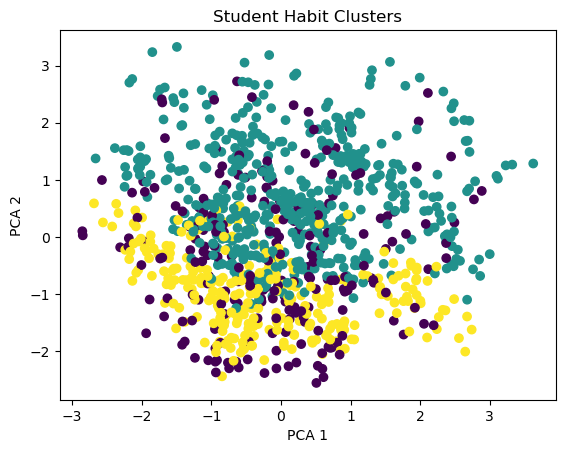

In [31]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.title("Student Habit Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()